In [22]:
import pandas as pd
import quandl

In [23]:
start= pd.to_datetime('2018-01-02')
end= pd.to_datetime('2018-03-27')

In [28]:
aapl= quandl.get('WIKI/AAPL.11', start_date=start, end_date=end)
ibm= quandl.get('WIKI/IBM.11', start_date=start, end_date=end)
amzn= quandl.get('WIKI/AMZN.11', start_date=start, end_date=end)
fb= quandl.get('WIKI/FB.11', start_date=start, end_date=end)

In [29]:
for stock_df in (fb, amzn, aapl, ibm): 
    stock_df['Normed Return'] = stock_df['Adj. Close'] /stock_df.iloc[0]['Adj. Close']

In [30]:
for stock_df, allo in zip((fb, amzn, aapl, ibm),[.2,.4,.3,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [32]:
# value of each position
for stock_df in (fb, amzn, aapl, ibm):
    stock_df['Position Value'] = stock_df['Allocation']*1000000

In [33]:
# create list of all position values
all_pos_vals = [fb['Position Value'], amzn['Position Value'], aapl['Position Value'], ibm['Position Value']]

# concatenate the list of position values
portfolio_val = pd.concat(all_pos_vals, axis=1)

# set the column names
portfolio_val.columns = ['FB', 'AMZN', 'AAPL', 'IBM']

# add a total portfolio column
portfolio_val['Total'] = portfolio_val.sum(axis=1)

<AxesSubplot:xlabel='Date'>

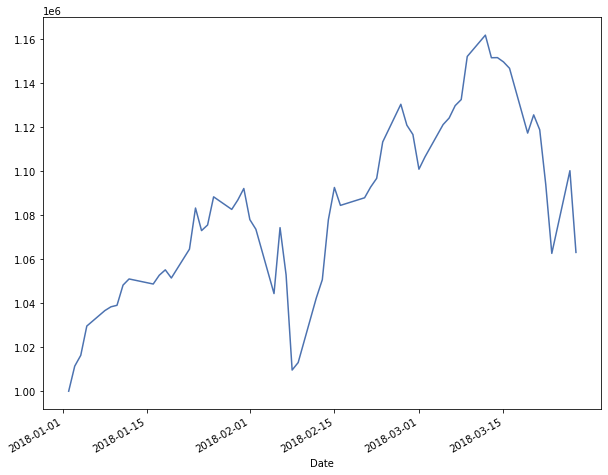

In [34]:
# plot our portfolio
import matplotlib.pyplot as plt
%matplotlib inline
portfolio_val['Total'].plot(figsize=(10,8))

<AxesSubplot:xlabel='Date'>

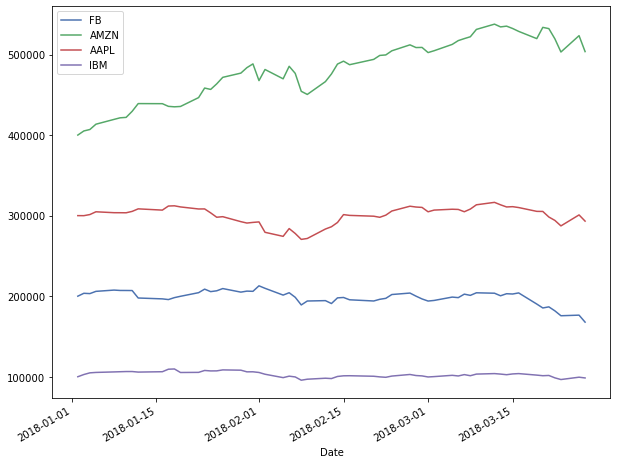

In [35]:
portfolio_val.drop('Total',axis=1).plot(figsize=(10,8))

In [36]:
# Daily Return
portfolio_val['Daily Return'] = portfolio_val['Total'].pct_change(1)

In [37]:
# average daily return
portfolio_val['Daily Return'].mean()

# standard deviation
portfolio_val['Daily Return'].std()

0.014972879740228043

<AxesSubplot:ylabel='Frequency'>

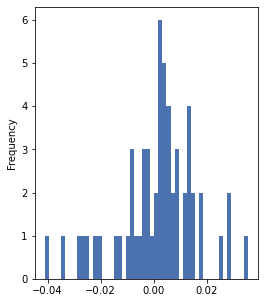

In [38]:
# plot histogram of daily returns
portfolio_val['Daily Return'].plot(kind='hist', bins=50, figsize=(4,5))

In [39]:
# cumulative portfolio return
cum_return = 100 * (portfolio_val['Total'][-1]/portfolio_val['Total'][0] - 1)

In [40]:
sharpe_ratio = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [41]:
ASR = (252**0.5) * sharpe_ratio

In [43]:
# get just the Adj Close column of FB, AMZN, AAPL, IBM
fb = quandl.get('WIKI/FB.11', start_date=start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date=start, end_date=end)
aapl = quandl.get('WIKI/AAPL.11', start_date=start, end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date=start, end_date=end)

In [44]:
# concatenate them and rename the columns
stocks = pd.concat([fb,amzn,aapl,ibm], axis=1)
stocks.columns = ['fb','amzn','aapl','ibm']

In [45]:
# arithmetic mean daily return
stocks.pct_change(1).mean()

fb     -0.002797
amzn    0.004150
aapl   -0.000258
ibm    -0.000130
dtype: float64

In [46]:
# arithmetic daily return
stocks.pct_change(1).head()


,fb,amzn,aapl,ibm
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,0.017914,0.012775,-0.000174,0.027488
2018-01-04,-0.001841,0.004476,0.004645,0.020254
2018-01-05,0.013671,0.016163,0.011385,0.004886
2018-01-08,0.007653,0.014425,-0.003714,0.006031


In [47]:
# log daily return
log_return = np.log(stocks/stocks.shift(1))

In [49]:
print(stocks.columns)

weights = np.array(np.random.random(4))
print('Random Weights:')
print(weights)

print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

# expected return
print('Expected Portfolio Return')
exp_ret = np.sum((log_return.mean()*weights)*252)
print(exp_ret)

# expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['fb', 'amzn', 'aapl', 'ibm'], dtype='object')
Random Weights:
[0.95452275 0.46472126 0.1104554  0.3963302 ]
Rebalance
[0.4955909  0.24128459 0.05734876 0.20577576]
Expected Portfolio Return
-0.15618593370430295
Expected Volatility
0.26066454670195655
Sharpe Ratio
-0.5991836468765571


In [50]:
num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports): 
    # weights 
    weights = np.array(np.random.random(4)) 
    weights = weights/np.sum(weights)  

    # save the weights
    all_weights[ind,:] = weights

    # expected return 
    ret_arr[ind] = np.sum((log_return.mean()*weights)*252)

    # expected volatility 
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))

    # Sharpe Ratio 
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

Text(0, 0.5, 'Return')

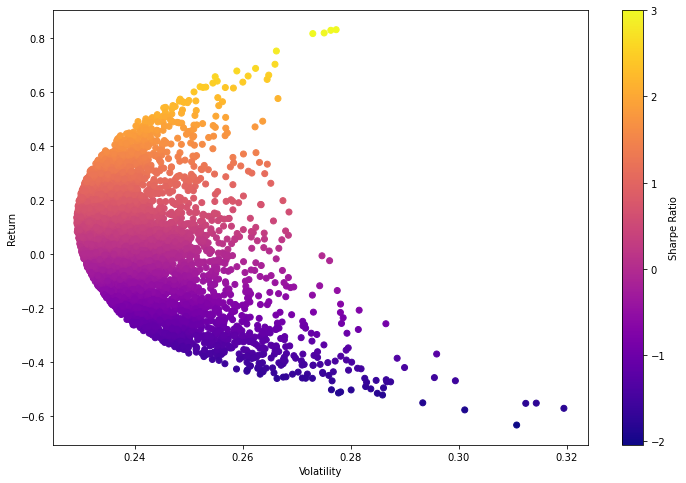

In [51]:
# plot the data
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')


In [52]:
max_sr_ret = ret_arr[4988]
max_sr_vol = vol_arr[4988]

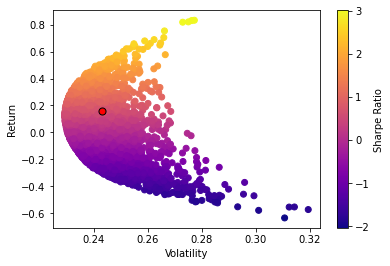

In [54]:
# plot the dataplt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# add a red dot for max_sr_vol & max_sr_ret
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black')

In [64]:
def get_ret_vol_sr(weights): 
    weights = np.array(weights)
    ret = np.sum(log_return.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    sr = ret/vol 
    return np.array([ret,vol,sr])

In [65]:
from scipy.optimize import minimize

In [66]:
# minimize negative Sharpe Ratio
def neg_sharpe(weights): 
    return get_ret_vol_sr(weights)[2] * -1

In [67]:
# check allocation sums to 1
def check_sum(weights): 
    return np.sum(weights) - 1

In [68]:
# create constraint variable
cons = ({'type':'eq','fun':check_sum})

In [69]:
# create weight boundaries
bounds = ((0,1),(0,1),(0,1),(0,1))

In [70]:
# initial guess
init_guess = [0.25, 0.25, 0.25, 0.25]

In [71]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

In [73]:
opt_results.x

array([3.83026943e-15, 1.00000000e+00, 7.77156117e-16, 6.66133815e-16])

In [74]:
get_ret_vol_sr(opt_results.x)

array([1.00094173, 0.29559527, 3.38618989])